# 1. Hadoop 환경설정 파일 수정

* 환경변수 설정까지는 각 가상머신에서 진행
* 설정 파일 수정은 master머신에서 진행 후 SSH를 통해 workers에 복사
* Hadoop의 환경 설정 파일은 크게 두가지로 분류

### Read-only Default configuration
* 모든 Hadoop 노드에 동일하게 적용되는 설정 -> 클러스터의 동작을 일관되게 유지하게 위하여 사용
* Hadoop의 기본 동작들을 정의
* 이 파일들은 변경되지 않는다고 가정하고, 모든 노드에서 동일한 값을 가짐
* core-default.xml, hdfs-default.xml, yarn-default.xml, mapred-default.xml이 해당

### Site-specific configuration
* 각 노드 또는 클러스터 별로 특정한(site-specific)설정 제공: 클러스터와 각 노드들을 세밀하게 제어하기 위하여 사용
* 노드의 역할(NameNode, DataNode), 하드웨어 구성(메모리 크기, CPU코어 수)또는 네트워크 설정(IP주소, 포트번호) 등에 따라서 상황에 맞게 설정
* etc/hadoop/core-site.xml, etc/hadoop/hdfs-site.xml, etc/hadoop/yarn-site.xml, etc/hadoop/mapred-site.xml이 해당
* 추가적으로 etc/디렉토리 내 hadoop-env.sh, yarn-enc.sh파일에 site-specific한 값을 설정함으로써 /bin 디렉토리 내 Hadoop스크립트들을 조정 가능

* Hadoop Cluster는 크게 Masters와 Workers로 구분

|구분|대표적인 Node|
|---|---|
|Masters|NameNode <br> ResourceManager|
|Workers|DataNode <br> NodeManager|


* Hadoop의 데몬들은 아래와 같이 구분

|Daemon|Node|
|---|---|
|HDFS Daemon|NameNode <br> SecondaryNameNode <br> DataNode|
|YARN Daemon|ResourceManager <br> NodeManager <br> WebAppProxy|
|MapReduce Daemon|Job History Server|

* 설정이 필요한 파일은 다음과 같다.

|파일명|용도|
|---|---|
|etc/hadoop-env.sh|- Hadoop을 실행하는 셀 스크립트 파일에서 필요한 환경변수를 설정 <br> - bin디렉토리 안에 있는 셀 스크립트 파일들이 hadoop-env.sh를 사용 <br> - JDK경로, 클래스 패스, 데몬 실행 옵션 등 다양한 환경변수 설정 가능|
|etc/core-site.xml|- HDFS와 MapReduce에서 공통적으로 사용할 환경 정보 설정 <br> - core-site.xml은 Read-Only인 core-default.xml을 오버라이드 한 것 <br> - core-site.xml에 설정값이 없을 경우 core-default.xml의 설정을 따름|
|etc/hdfs-site.xml|- HDFS에서 사용할 환경 정보 설정 <br> - hdfs-site.xml은 Read-Only인 hdfs-default.xml을 오버라이드 한 것 <br> - hdfs-site.xml에 설정값이 없을 경우 hdfs-default.xml에 있는 기본 값 사용|
|etc/yarn-site.xml|- YARN에서 사용할 환경 정보 설정 <br> - yarn-site.xml은 Read-Only인 yarn-default.xml을 오버라이드 한것 <br> - yarn-site.xml에 설정값이 없을 경우 yarn-default.xml에 있는 기본 값 사용|
|etc/mapred-site.xml|MapReduce 프레임워크 동작에 대한 설정 <br> - mapred-site.xml은 Read-Only인 mapred-deafult.xml을 오버라이드 한것 <br> - mapred-site.xml에 설정값이 없을 경우 mapred-default.xml에 있는 기본값 사용|
|etc/worker|DataNode를 실행할 서버 설정|


## 환경변수 설정

In [ ]:
echo 'export HADOOP_HOME="/usr/local/hadoop"' >> ~/.bashrc
source ~/.bashrc

# 결과확인
echo $HADOOP_HOME

### hadoop-env.sh 파일 수정

In [ ]:
# 파일 열기
sudo vi $HADOOP_HOME/etc/hadoop/hadoop-env.sh

In [ ]:
# JAVA_HOME을 찾아 경로 입력
JAVA_HOME=usr/lib/jvm/java-8-openjdk-amd64

In [ ]:
# HADOOP_PID_DIR 수정
export HADOOP_PID_DIR=/usr/local/hadoop/pids

* Hadoop데몬들의 프로세스 ID(PID)들이 저장되는 디렉토리
* **PID**
    - 운영체제에서 특정 프로세스를 유일하게 식별하는 번호
    - 시스템 내에서 해당 프로세스를 관리하고 제어하는데 사용
    - 예를 들어, 특정 프로세스를 종료하거나 그 상태를 확인할 때 PID 사용
    - Hadoop에서는 각 데몬 프로세스(예: NameNode, DataNode 등)가 시작될 때 해당 프로세스의 PID가 파일로 저장됨
    - Hadoop의 관리 스크립트들은 이 PID파일들을 읽어 해당 데몬이 현재 실행 중인지, 아니면 중지된 상태인지 등을 판단할 수 있음
* HADOOP_PID_DIR을 설정하지 않으면, 기본적으로 /tmp 디렉토리에 PID파일들이 저장되게 되는데, /tmp디렉토리는 일반적으로 재부팅 시에 내용이 지워지므로, 실제 운영환경에서는 보통 HADOOP_PID_DIR를 별도의 안정적인 위치로 설정하여 사용

### core-site.xml 파일 수정

In [ ]:
sudo vi $HADOOP_HOME/etc/hadoop/core-site.xml

In [ ]:
# fs.defaultFS와 hadoop.tmp.dir파라미터를 추가하고, 다른 파라미터들은 core-default.xml에 있는 기본값 사용
<configuration>
<property>
    <name>fs.defaultFS</name>
    <value>hdfs://master:9000</value>
</property>
<property>
    <name>hadoop.tmp.dir</name>
    <value>/usr/local/hadoop/hadoop-data</value>
</property>

#### fs.deaultFS
* HDFS의 NameNode URL(Uniform Resorce Identifier)를 정의 -> 즉, 클라이언트들이 어껀 NameNode로 연결할지 결정
* 기본 값은 "file://"로 되어있지만, 실제로는 "hdfs://localhost:9000"과 같은 형식으로 사용
* DataNode와 클라이언트는 여러 작업을 진행하기 위해서 반드시 NameNode의 주소를 알고 있어야 함
* 같은 목적을 지닌 fs.default.name 파라미터도 있지만, Hadoop2.0이상의 최신버전에서는 fs.deaultFS 사용을 권장
* Hadoop에서는 기본적으로 9000번 포트를 NameNode로 사용
* 해당 포트는 클라이언트 및 다른 Hadoop데몬(예: DataNode, Secondary NameNode 등)들이 HDFS에 접근하기 위한 RPC(Remote Procedure call) 포트
* NameNode는 HDFS의 메타데이터를 관리 -> 클라이언트나 다른 Hadoop노드(DataNode 등)들이 HDFS에 접근하려 할떄, NameNode에 있는 메타데이터를 통해 파일의 위치 정보 등을 획득
* 클라이언트와 다른 Hadoop노드들은 이러한 메타데이터를 통해 실제 파일 데이터를 지닌 DataNode에 접근
* 이 포트를 통해 클라이언트는 파일시스템에 대한 읽기/쓰기 요청을 보내고, DataNode들은 블록 보고(Block Report)와 Heartbeat를 전송 -> NameNode는 이러한 요청과 응답들을 통해 HDFS를 제어하고 관리
* 보안정책, 포트 충돌 등으로 다른 포트를 사용해야 하는 경우 9000대신 다른 포트 번호를 입력하면 됨

#### hadoop.tmp.dir
* Hadoop에서 발생하는 임시 파일 및 데이터를 저장하기 위한 디렉토리 설정
* Hadoop의 여러 서브 시스템들이 이 디렉토리를 사용(예: HDFS는 여기에 NameNode와 DataNode의 상태를 저장)
* 해당 디렉토리는 각 노드의 로컬 파일시스템에 위치하며 각 노드의 로컬 작업에 대한 일시적인 저장공간으로써 활용굄 <br>
-> 노드 간 공유가 되지 않으므로, 디렉토리가 손상되거나 삭제되면 Hadoop 클러스터 전체에 문제가 발생할 수 있음
* 이 디렉토리는 안전한 위치에 있어야 하며, 정기적인 백업 필요

### hdfs-site.xml 파일 수정

In [ ]:
# 파일 열기
sudo vi $HADOOP_HOME/etc/hadoop/hdfs-site.xml

In [ ]:
# 설정이 필요한 파라미터 작성
<configuration>
<property>
    <name>dfs.replication</name>
    <value>3</value>
</property>
<property>
    <name>dfs.namenode.name.dir</name>
    <value>file:/usr/local/hadoop/data/dfs/namenode</value>
</property>
<property>
    <name>dfs.namenode.http-address</name>
    <value>master:9870</value>
</property>
<property>
    <name>dfs.namenode.secondary.http-address</name>
    <value>worker01:9868</value>
</property>
<property>
    <name>dfs.namenode.checkpoint.dir</name>
    <value>file:/usr/local/hadoop/hdfs/namesecondary</value>
</property>
<property>
    <name>dfs.datanode.data.dir</name>
    <value>file:/usr/local/hadoop/data/dfs/datanode</value>
</property>
</configuration>

### 공통

#### dfs.replication
* HDFS에서 저장할 테이터의 복제본 개수를 설정(디폴트값 = 3)
* 1로 설정하면 가상분산모드(Pseudo-distributed mode)로 Hadoop을 실행하겠다는 의미
* 실습은 완전 분산모드(Fully dustributed mode)이므로 디폴드값이 3을 그대로 사용 -> HDFS에 파일을 저장하면 3개의 복제본으로 저장됨
* Node 장애에 대한 내상을 제공하며, 파일을 읽는데 사용할 수 있는 또다른 경로를 제공

### NameNode 설정

#### dfs.namenode.name.dir
* HDFS의 NameNode가 파일 이미지(fsimage) 및 편집 로그를 저장하는데 사용하는 디렉토리를 지정
* 파일 시스템 미지(fsimage): HDFS의 메타데이터를 포함하며, 이 메타데이터는 파일 시스템 트리와 각 파일의 블록의 위치 등의 정보를 포함
* 편집 로그: 파일 시스템 이미지의 메타데이터에 대한 모든 변경사항 추적
* 실슴에선 경로 하나만을 작성했지만, 쉼표로 구분하여 경로 목록으로 작성 가능하며, 이 경우 모든 지정된 디렉토리에 메타데이터를 저장하여 장애 복구를 위한 중복성을 마련 가능

#### dfs.namenode.http-address
* NameNode의 HTTP 서버가 수신 대기할 IP주소와 포트를 지정(디폴드 포트 = 9870)
* 클라이언트와 노드들은 http웹 인터페이스를 사용한 NameNode접근이 필요한 경우 이 파라미터에서 설정된 서버에 접근
* 특히, Secondary NameNode는 NameNode와 동일한 메타데이터를 유지하기 위하여 주기적으로 체크포인트 작업(NameNode의 메타데이터를 가져옴)을 수행 -> 이 작업은 주로 HTTP기반 프로토콜을 통해 수행됨
* 따라서 이 파라미터가 없을 경우 Secondary NameNode가 NameNode에 접속하지 못하게 할 수 있음

#### Secondary NameNode는
1) 일반적인 파일 시스템 작업은 위에서 설명한 RPC포트(기본값 9000) 사용
2) 메타데이터 동기화, 체크포인트 생성을 위해선 HTTP포트(기본값 9870) 사용

* 최근 버전의 Hadoop에서는 확장성과 유연성을 위하여 dfs.namenode.http-bind-host와 dfs.namenode.http-port로 분리하여 사용하기도 함

### Secondary NameNode 설정

#### dfs.namenode.secondary.http-address
* Secondary NameNode의 HTTP서버가 수신 대기할 IP주소와 포트를 지정(디폴드 포트 = 9868)

#### dfs.namenode.checkpoint.dir
* Secondary NameNode가 체크포인트를 저장하는 경로 지정
* 지정하지 않을 시 기본 값인 /tmp/hadoop-${user.name}/dfs/namesecondary에 저장

### DataNode 설정

#### dfs.datanode.data.dtr
* HDFS의 DataNode가 HDFS블록을 저장하는 데 사용하는 디렉토리를 지정
* DataNode는 HDFS의 워커노드로, 실제 데이터 블록을 저장
* 실습에선 경로 하나만을 작성했지만, 쉼표로 구분하여 경로 목록으로 작성 가능하며, 이 경우 모든 지정된 디렉토리에 메타데이터를 저장하여 장애 복구를 위한 중복성 마련 가능

### yarn-site.xml 파일 수정

In [ ]:
# 파일 열기
sudo vi $HADOOP_HOME/etc/hadoop/yarn-site.xml

In [ ]:
# 설정이 필요한 파라미터 작성
configuration>
<property>
    <name>yarn.resourcemanager.hostname</name>
    <value>master</value>
</property>
<property>
    <name>yarn.nodemanager.aux-services</name>
    <value>mapreduce_shuffle</value>
</property>
<property>
    <name>yarn.nodemanager.aux-services.mapreduce.shuffle.class</name>
    <value>org.apache.hadoop.mapred.ShuffleHandler</value>
</property>
    <!-- Site specific YARN configuration properties -->
</configuration>

* 실습에서는 NameNode가 위치하는 master에 ResourceManager 설치
* 일반적으로 YARN의 Resource Manager와 HDFS의 NameNode를 동일한 머신에 설치하는 것은 추천하지 않음<br>
-> 이 두 컴포넌트는 모두 Hadoop 클러스터의 중심역할을 하는 중요한 서비스이며, 각각 메모리, CPU, 네트워크 등 시스템 리소스를 상당히 많이 사용
* 이 두 서비스를 동일한 머신에 실행하면, 하나의 서비스에 문제가 생겼을 때 다른 서비스에도 영향을 줄 수 있으며, 두 서비스의 리소스 결합으로 성능 저하가 발생할 수 있음 <br>
-> 따라서 실제로 사용하는 경우, 이들 서비스를 별도의 머신에 배치하여 분리 권장

### ResourceManager 설정

#### yarn.resourcemanager.hostname
* YARN의 ResourceManager서비스를 실행하는 노드의 호스트네임을 설정
* 이 값이 설정되지 않으면 ResourceManager는 기본적으로 localhost(즉, 127.0.0.1) 사용
* yarn.resourcemanager.hostnamer를 설정하면, YARN클러스터의 다른 모든 노드(예: NodeManager, 클라이언트)는 이를 통해 ResourceManager에 접속함(디폴트 값으로 8032 포트 사용)

### NodeManger 설정

#### yarn.nodemanager.aux-services
* YARN에서 실행하는 보조 서비스(YARN 클러스터에서 실해오디는 어플리케이션들이 사용할 추가 기능들)를 정의하는 설정
* 이 중 'mapreduce_shuffle'은 기본적으로 사용되는 보조 서비스
* 셔플 단계를 처리하는데 필요하기 때문에 MapReduce작업을 실행하려면 이 서비스가 반드시 필요

#### yarn.nodemanager.aux-services.mapreduce.shuffle.class
* 위에서 설정한 보조 서비스인 'shuffle'의 구현 클래스를 지정하는 설정
* 보통 org.apache.hadoop.mapred.ShuffleHandler 클래스를 지정
* Hadoop의 HTTP기반 ShuffleHandler 구현체로, MapReduce 작업의 shuffle단계를 처리
* 이 설정이 존재해야만 YARN클러스터에서 MapReduce작업을 실행가능하며, 이 설정이 없거나 잘못 설정되면 MapReduce작업의 shuffle단계에서 에러 발생


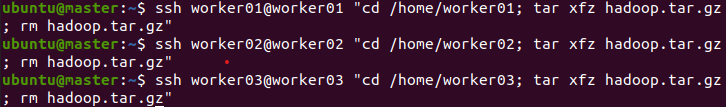

* worker01

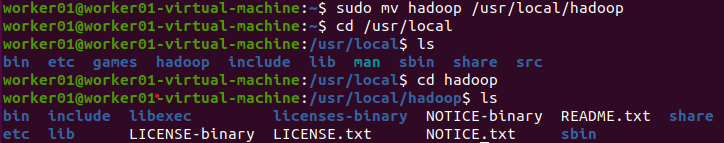

* worker02

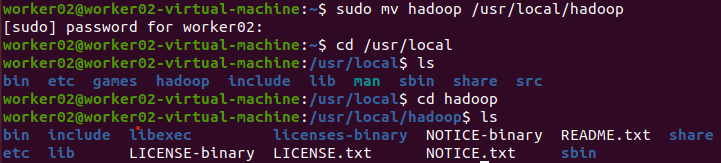

* worker03


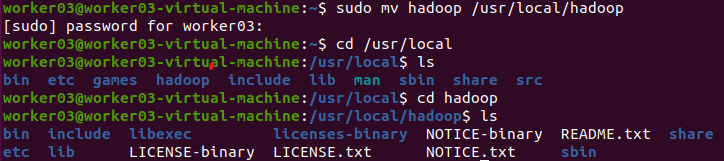